# Build TAO model

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.7.3


In [2]:
model = orsa.model.Model([], np.arange(0.5, 12, 0.005), 0.8, 11, orsa.oscillation.default(), orsa.detector.default(), False, True, True, rebin = 1, exposure = 1)

model.add_parameter(orsa.model.DetectorParameter(label = 'eff', value = 1,          error = 0.01,   prior = {'positive': None},   formatted_label = r'$\epsilon$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a',   value = 0.015,    error = 0.0077, prior = {'positive': None},   formatted_label = r'$a$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'b',   value = 0.001,   error = 0.,  prior = {'positive': None},   formatted_label = r'$b$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'c',   value = 0.001,    error = 0.,  prior = {'positive': None},   formatted_label = r'$c$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a0',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_0$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a1',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_1$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a2',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_2$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a3',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_3$'))

model.add_parameter(orsa.model.OscillationParameter(label = 'rho',      value = 2.45,       error = 0.06,   prior = {'positive': None}, formatted_label = r'$\rho$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_21',   value = 7.53e-5,    error = np.inf,                       formatted_label = r'$\Delta m^2_{21}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_31',   value = 2.5283e-3,  error = np.inf,                       formatted_label = r'$\Delta m^2_{31}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_12',    value = 0.307,      error = np.inf,                       formatted_label = r'$\sin^2 \theta_{12}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_13',    value = 0.0218,     error = np.inf,                       formatted_label = r'$\sin^2 \theta_{13}$'))

shape_fact = np.sqrt(36e-03/model.bin)
shape_fact_20 = np.sqrt(20e-03/model.bin)

gen_dict = dict()
gen_dict['rea'] = orsa.generator.sniper('reactors', True, shape_uncertainty='tao')
gen_dict['U'] = orsa.generator.geoneutrinos('238U', True, True, shape_uncertainty=0.05)
gen_dict['Th'] = orsa.generator.geoneutrinos('232Th', True, True, shape_uncertainty=0.05)
gen_dict['geo'] = orsa.generator.spe2gen(0.9*orsa.generator.geoneutrinos('238U', True, True).get_spectrum(model.E_eval) + 0.3*orsa.generator.geoneutrinos('232Th', True, True).get_spectrum(model.E_eval), shape_uncertainty=0.05)
gen_dict['lihe'] =  orsa.generator.sniper('lihe', True, shape_uncertainty=0.1)
gen_dict['acc'] =  orsa.generator.sniper('accidentals', True, shape_uncertainty=0)
gen_dict['fn'] = orsa.generator.common_inputs('FnBkgHistogramAD', orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.2)
gen_dict['alpha'] = orsa.generator.common_inputs('AlphaNBkgHistogramAD',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5)
gen_dict['glob'] = orsa.generator.common_inputs('OtherReactorSpectrum_L300km',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.05)
gen_dict['atm'] = orsa.generator.common_inputs('AtmosphericNeutrinoModelGENIE2',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5) 
gen_dict['snf'] = orsa.generator.common_inputs('SNF_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)  
gen_dict['noneq'] = orsa.generator.common_inputs('NonEq_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)

model.add_parameter(orsa.model.CoreParameter(label = 'TS-C1', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{TS-C1}$', baseline = 0.030, power = 4.6))
model.add_parameter(orsa.model.CoreParameter(label = 'TS-C2', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{TS-C2}$', baseline = 0.225, power = 4.6))

model.add_parameter(orsa.model.NormalizationParameter(label = 'rea',   value = 2000,    generator = gen_dict['rea'],     error = 0.1,     is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{rea}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'U',     value = 0.,     generator = gen_dict['U'],       error = 0.,                                           formatted_label = r'$N_\mathrm{U}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'Th',    value = 0.,     generator = gen_dict['Th'],      error = 0.,                                           formatted_label = r'$N_\mathrm{Th}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'acc',   value = 155.,     generator = gen_dict['acc'],     error = 0.01,                                             formatted_label = r'$N_\mathrm{acc}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'lihe',  value = 54.,     generator = gen_dict['lihe'],    error = 0.2,                                              formatted_label = r'$N_\mathrm{Li/He}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'fn',    value = 92.,     generator = gen_dict['fn'],      error = 1.,                                               formatted_label = r'$N_\mathrm{fn}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'alpha', value = 0.,    generator = gen_dict['alpha'],   error = 0.,                                              formatted_label = r'$N_\mathrm{\alpha}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'glob',  value = 0.,     generator = gen_dict['glob'],    error = 0.,                                             formatted_label = r'$N_\mathrm{glob}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'atm',   value = 0.,    generator = gen_dict['atm'],     error = 0.,                                              formatted_label = r'$N_\mathrm{atm}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'snf',   value = 0.,    generator = gen_dict['snf'],     error = 0.,      is_oscillated=True, has_duty=False,     formatted_label = r'$N_\mathrm{SNF}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'noneq', value = 0.,    generator = gen_dict['noneq'],   error = 0.,      is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{noneq}$'))

model.exposure = 6*365.25

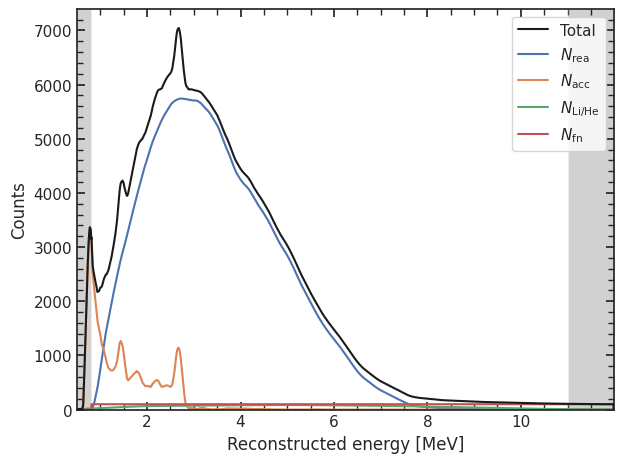

In [3]:
model # use model.to_json(filename) to store it to file

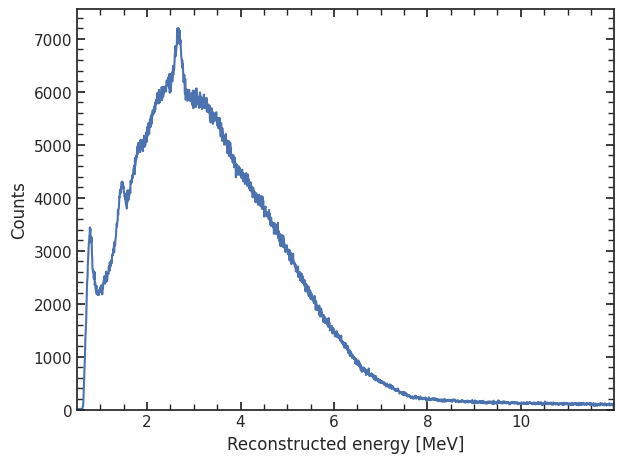

In [4]:
data = model.get_spectrum(asimov = False)
data

In [5]:
for param in model.oscillation_parameters:
    model.oscillation_parameters[param].fixed = True

for param in model.detector_parameters:
    model.detector_parameters[param].fixed = False

In [6]:
init_model = model.copy()
min_func_bin = orsa.probability.CostFunction(ll=orsa.probability.chi2, ll_args=dict(data=data), lp_args=model.get_priors())
model.use_shape_uncertainty = False
res = orsa.fit.minuit(model, min_func_bin)

Cost function parsed as chi2-like


In [7]:
res.obj

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2325                       │              Nfcn = 398              │
│ EDM = 2.02e-05 (Goal: 0.0002)    │           time = 26.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ eff   │   1.00    │   0.01    │            │            │         │         │       │
│ 1 │ a     │ 15.00e-3  │  0.12e-3  │            │            │         │         │       │
│ 2 │ a0    │    0.4    │    1.6    │            │            │         │         │       │
│ 3 │ a1    │    0.4    │    1.3    │            │            │         │         │       │
│ 4 │ a2    │    0.2    │    0.8    │            │            │         │         │       │
│ 5 │ a3    │    0.1    │    1.1    │            │            │         │         │       │
│ 6 │ TS-C1 │   1.000   │   0.008   │            │            │         │         │       │
│ 7 │ TS-C2 │   1.000   │   0.008   │            │            │         │         │       │
│ 8 │ rea   │  4.02e6   │  0.05e6   │            │            │         │         │       │
│ 9 │ acc   │  338.4e3  │   1.0e3   │            │            │         │         │       │
│ 10│ lihe  │  118.3e3  │   2.1e3   │            │            │         │         │       │
│ 11│ fn    │  202.8e3  │   1.2e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │         eff           a          a0          a1          a2          a3       TS-C1       TS-C2         rea         acc        lihe          fn │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│   eff │    9.92e-05           0           0          -0          -0          -0          -0          -0  -396.25759    -1.63e-3    -4.85e-3     1.16e-3 │
│     a │           0    1.33e-08   -1.003e-6   -0.691e-6   -0.432e-6   -0.531e-6           0           0 1.089143e-3 -365.475e-6 -791.389e-6  140.147e-6 │
│    a0 │           0   -1.003e-6        2.68         2.0         1.2         1.7           0          -0        95.2       216.2      -568.6       175.3 │
│    a1 │          -0   -0.691e-6         2.0         1.6         0.9         1.3           0          -0      -114.5       171.3      -221.0       100.8 │
│    a2 │          -0   -0.432e-6         1.2         0.9       0.576         0.8           0          -0       -92.7       147.9      -175.3        70.9 │
│    a3 │          -0   -0.531e-6         1.7         1.3         0.8        1.18           0          -0       -33.4       226.9      -403.7       134.9 │
│ TS-C1 │          -0           0           0           0           0           0    6.37e-05          -0  -249.10888    -0.53e-3    -1.93e-3     0.61e-3 │
│ TS-C2 │          -0           0          -0          -